# <center> UE22CS342AA2 - Data Analytics </center>

# <center> Worksheet 4a: Collaborative Filtering </center>

<center> Designed by Amritha GK, PESU-25 </center>

<br>

- Student name: Jananii Ramesh
- SRN: PES2UG22CS906
- Section: A

Assume there exists a parallel universe and you are a Data Analyst intern at Parallel Earth Amazon. The company wants to test product recommendations and improve their product catalogue. For this exercise, you are tasked with the analysis of User Ratings for Health and Personal Care Products.



# Details of the dataset:

### Columns in this dataset:

- 'sl': serial number of records

- 'user_id': Unique identifier for users

- 'title': title of the review

- 'text': body of the review

- 'asin': Amazon Standard Identification Number (ASIN) is a ten-digit alphanumeric code that identifies products on Amazon. It's unique for each product and is assigned when you create a new product in Amazon's catalog.

- 'parent_asin': The abstraction of the variations is called the parent ASIN. It can't be purchased and hence is not associated with an offer.

- 'rating': Product rating (out of 5)

- 'timestamp': In milliseconds

- 'helpful_vote': Interactions of other users with this review

- 'verified_purchase': (True or False) Amazon has verified that the person writing the review purchased the product from Amazon, and didn't receive the product at a discount.



## Some conceptual information:

### Utility Matrix

This is an m x n matrix (m users, n items) that consists the rating / preference of each user for each item.

It is usually quite sparse as the rating values are usually present for very few user-item pairs.



### Neighborhood-based methods

The main idea with neighborhood-based methods is to leverage either user-user similarity or item-item similarity to make recommendations. These methods assume that similar users tend to have similar behaviors when rating items.

There are mainly two types:



1. **User-based collaborative filtering**: based on similarity between users.

2. **Item-based collaborative filtering**: based on similarity between items.



### Matrix factorization/decomposition

The utility matrix can be represented as a product of two smaller matrices, say U and V, representing users and items respectively.

## Install the required packages

In [1]:
install.packages("recommenderlab")
install.packages("tidyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Load the required packages

In [2]:
library(dplyr)

library(tidyr)   

library(recommenderlab)

library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loading required package: arules


Attaching package: ‘arules’


The following object is masked from ‘package:dplyr’:

    recode


The following objects are masked from ‘package:base’:

    abbreviate, write


Loading required package: proxy


Attaching package: ‘proxy’


The following object is masked from ‘package:Matrix’:

    as.matrix


The following objects are masked from ‘package:stats’:

    as.dist, dist


The following object is masked from ‘package:base’:

    as.matrix


Registered S3 methods overwritten by 'registry':
  method               from 
  print.registry_field proxy
  print.registry_entry proxy



## Load and create dataframe

In [3]:
# Your code here
df = read.csv("/kaggle/input/health-and-personal-care-dataset/Worksheet-4a_Health_And_Personal_Care_Dataset.csv")
print(head(df))

     X                      user_id                              title
1 2809 AE23ZBUF2YVBQPH2NN6F5XSA3QYQ The Soap Petals Are A Fun Addition
2 2549 AE23ZBUF2YVBQPH2NN6F5XSA3QYQ      Add More Water Than Suggested
3 2593 AE23ZBUF2YVBQPH2NN6F5XSA3QYQ              Not very comfortable.
4 3280 AE23ZBUF2YVBQPH2NN6F5XSA3QYQ               Smells Intoxicating!
5 2178 AE23ZBUF2YVBQPH2NN6F5XSA3QYQ                 More Perfume Scent
6  397 AE23ZBUF2YVBQPH2NN6F5XSA3QYQ      Good Gauze, Okay Medical Tape
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

## Perform EDA and Preprocess the dataset to the required format

### 1 point

State some observations that you made after performing EDA.

Feel free to remove any columns you think are not necessary for the following problems.

Some hints to help you get started:
- Check the summary, number of rows and columns
- Remove null values and duplicates
- Obtain a subset of the dataset with the required columns only.
- Create the utility matrix


In [4]:
# Check the summary of the data
summary(df)

# Check the number of rows and columns
cat("Number of rows:", nrow(df), "\n")
cat("Number of columns:", ncol(df), "\n")

# Check for null values column-wise
null_counts <- colSums(is.na(df))
print("Null values per column:")
print(null_counts)

# Remove duplicates
df <- unique(df)
cat("Data after removing duplicates:\n")
#print(df)
 

# Obtain a subset of the dataset with the required columns only
# Correct use of subset for selecting columns
subset_df <- subset(df, select = c(user_id, asin, rating))
cat("Subset of data with selected columns:\n")
print(head(subset_df))


       X          user_id             title               text          
 Min.   :   0   Length:4276        Length:4276        Length:4276       
 1st Qu.:1129   Class :character   Class :character   Class :character  
 Median :2278   Mode  :character   Mode  :character   Mode  :character  
 Mean   :2284                                                           
 3rd Qu.:3437                                                           
 Max.   :4589                                                           
     asin           parent_asin            rating        timestamp        
 Length:4276        Length:4276        Min.   :1.000   Min.   :1.345e+12  
 Class :character   Class :character   1st Qu.:4.000   1st Qu.:1.593e+12  
 Mode  :character   Mode  :character   Median :5.000   Median :1.613e+12  
                                       Mean   :4.285   Mean   :1.610e+12  
                                       3rd Qu.:5.000   3rd Qu.:1.634e+12  
                                       

Number of rows: 4276 
Number of columns: 10 
[1] "Null values per column:"
                X           user_id             title              text 
                0                 0                 0                 0 
             asin       parent_asin            rating         timestamp 
                0                 0                 0                 0 
     helpful_vote verified_purchase 
                0                 0 
Data after removing duplicates:
Subset of data with selected columns:
                       user_id       asin rating
1 AE23ZBUF2YVBQPH2NN6F5XSA3QYQ B08D93ZSWY      5
2 AE23ZBUF2YVBQPH2NN6F5XSA3QYQ B09GL3RDTD      4
3 AE23ZBUF2YVBQPH2NN6F5XSA3QYQ B08RD257KT      2
4 AE23ZBUF2YVBQPH2NN6F5XSA3QYQ B098WFX6TY      5
5 AE23ZBUF2YVBQPH2NN6F5XSA3QYQ B08Z474Q6J      4
6 AE23ZBUF2YVBQPH2NN6F5XSA3QYQ B093ZTWFGP      5


In [5]:
#Create the utility matrix
# This matrix will show user ratings for each product
utility_matrix <- subset_df %>% 
  pivot_wider(names_from = asin, values_from = rating, values_fill = NA)

# View the utility matrix
print(utility_matrix)

# A tibble: 500 × 881
   user_id     B08D93ZSWY B09GL3RDTD B08RD257KT B098WFX6TY B08Z474Q6J B093ZTWFGP
   <chr>            <dbl>      <dbl>      <dbl>      <dbl>      <dbl>      <dbl>
 1 AE23ZBUF2Y…          5          4          2          5          4          5
 2 AE2O2C43KT…         NA         NA         NA         NA         NA          5
 3 AE2YCIHHZH…         NA         NA         NA         NA         NA         NA
 4 AE3335XF4P…         NA         NA         NA         NA         NA         NA
 5 AE3IGJOPJP…         NA         NA         NA         NA         NA         NA
 6 AE3KLVXGZP…         NA         NA         NA         NA         NA         NA
 7 AE3PLZHW6N…         NA         NA         NA         NA         NA         NA
 8 AE3TSST7D3…         NA         NA         NA         NA         NA         NA
 9 AE4FQVS6CJ…         NA         NA          3         NA         NA         NA
10 AE4JPPM4YP…         NA         NA         NA         NA         NA         NA
# ℹ 49

## Problem 1

### User-based collaborative filtering: 3 points (2+1)

1. As part of the test run of the new business strategy, you are supposed to pick a user (consider the user with user_id:"AE2O2C43KTYO4LXXGZWJZLE67GBQ") and recommend 5 products based on other similar users.

Remember to exclude the product(s) purchased by this user.

2. Which similarity metric did you use? Why?

In [6]:
# Convert utility matrix to a user-product matrix, excluding the user_id column
user_ratings <- as.matrix(utility_matrix[, -1])

# Define cosine similarity function
cosine_similarity <- function(x, y) {
  sum(x * y, na.rm = TRUE) / (sqrt(sum(x^2, na.rm = TRUE)) * sqrt(sum(y^2, na.rm = TRUE)))
}

# Set target user ID and extract target user's ratings
target_user_id <- "AE2O2C43KTYO4LXXGZWJZLE67GBQ"
target_user <- utility_matrix[utility_matrix$user_id == target_user_id, ]

# Calculate cosine similarity between target user and all other users
similarity_scores <- apply(user_ratings, 1, function(user) cosine_similarity(target_user[-1], user))

# Add similarity scores to the utility matrix
utility_matrix$similarity <- similarity_scores

# Find top 10 most similar users to the target user (excluding the target user)
similar_users <- utility_matrix[utility_matrix$user_id != target_user_id, ]
similar_users <- similar_users[order(-similar_users$similarity), ]
similar_users <- head(similar_users, 10)

# Identify products not yet purchased by the target user
user_products <- df[df$user_id == target_user_id, "asin"]

# Filter rows for similar users and unpurchased products, then calculate average ratings
recommendations <- df[df$user_id %in% similar_users$user_id & !(df$asin %in% user_products), ]
recommendations <- aggregate(rating ~ asin, data = recommendations, FUN = function(x) mean(x, na.rm = TRUE))
recommendations <- recommendations[order(-recommendations$rating), ]
recommendations <- head(recommendations, 10)  # Recommend top 10 products

# Display the recommended products
print(recommendations)


         asin rating
2  B074SPZRMM      5
18 B07XSKJ6LC      5
23 B082DH5YXY      5
27 B084RLGNM2      5
30 B085V468WY      5
31 B086862KGK      5
32 B086JGQ1SY      5
33 B086MFCTZN      5
38 B08C5D944Z      5
39 B08CKKLXHD      5


cosine similarity metric
reasons:Orientation-focused
        Sparse data handling
        Efficiency in high-dimensional spaces

## Problem 2

### 1 point

Consider the same user as in the previous problem.

Let's assume this user decides to purchase the first product among the recommendations above. What rating is the user likely to give to this product?

In [7]:
# Assume the first recommended product from the previous recommendations
recommended_product <- recommendations$asin[1]

# Retrieve ratings from similar users for the recommended product
similar_users_ratings <- df[df$user_id %in% similar_users$user_id & df$asin == recommended_product, ]
similar_users_ratings <- merge(similar_users_ratings, similar_users[, c("user_id", "similarity")], by = "user_id")

# Calculate weighted average of the ratings
predicted_rating <- sum(similar_users_ratings$rating * similar_users_ratings$similarity, na.rm = TRUE) / 
                    sum(similar_users_ratings$similarity, na.rm = TRUE)

# Print predicted rating
predicted_rating

[1] 5

## Problem 3

### Item-based Collaborative Filtering: 2 points

Use the item-based method from the package "recommenderlab" to recommend top-5 products to the user "AE5IMGWRBJA7JQFBQTBK25HDYGVA".

In [8]:
# Your code here
install.packages("recommenderlab")
library(recommenderlab)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [9]:
# Load necessary packages
library(dplyr)
library(tidyr)
library(recommenderlab)


# Step 1: Prepare the data as a rating matrix
df_matrix <- df[, c("user_id", "asin", "rating")]
df_matrix <- pivot_wider(df_matrix, names_from = asin, values_from = rating, values_fill = list(rating = NA))

# Convert to a data.frame and set 'user_id' as row names
df_matrix <- as.data.frame(df_matrix)
rownames(df_matrix) <- df_matrix$user_id

# Remove the 'user_id' column after setting it as row names
df_matrix <- df_matrix[, -which(names(df_matrix) == "user_id")]

# Step 2: Convert the data.frame to a matrix and then to a realRatingMatrix
rating_matrix <- as(as.matrix(df_matrix), "realRatingMatrix")

# Step 3: Check if the target user is present in the matrix
target_user <- "AE5IMGWRBJA7JQFBQTBK25HDYGVA"
if (!(target_user %in% rownames(rating_matrix))) {
  stop("Target user not found in the rating matrix.")
}

# Step 4: Build the Item-Based Collaborative Filtering Model
item_based_model <- Recommender(rating_matrix, method = "IBCF")

# Step 5: Generate recommendations for the target user
top_5_recommendations <- predict(item_based_model, rating_matrix[target_user, ], n = 5)

# Convert recommendations to a list of product IDs
recommended_products <- as(top_5_recommendations, "list")[[1]]

# Display recommended products
print(recommended_products)

[1] "B08RD257KT" "B0BCDSDSD1" "B0B28VNFB6" "B07VLBLNF3" "B08Q8MMGTB"


## Problem 4

### Long-tail problem: 2 points

1. Plot a graph of the products and their frequencies(in descending order of frequency). State your observations about the graph. 

2. Suggest 2 ways to overcome the long-tail problem of recommender systems.



List the links to the resources you referred to for your answer.

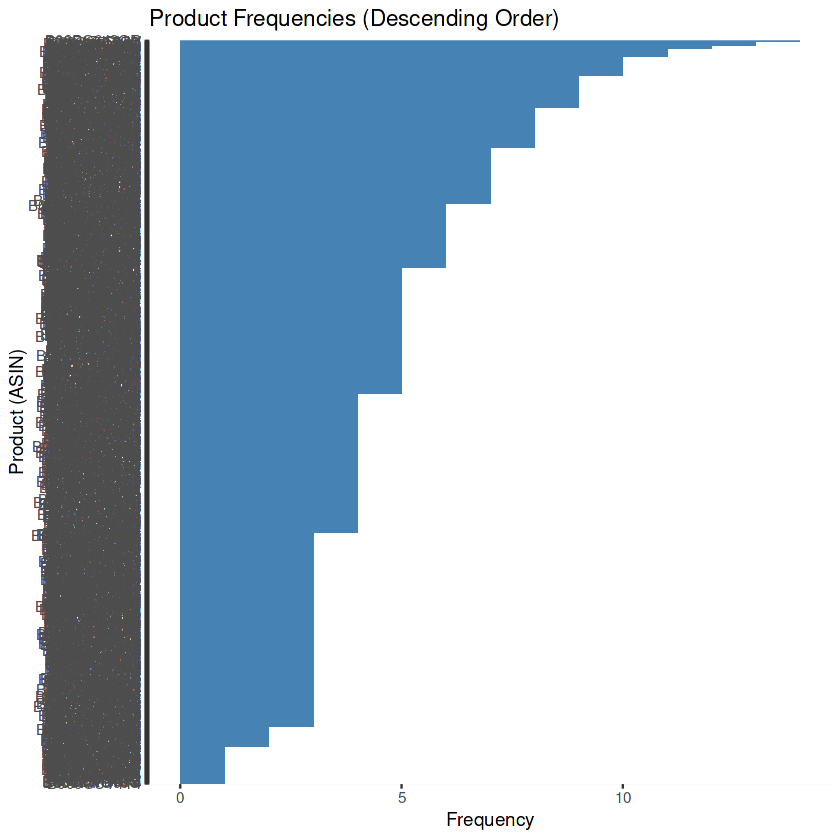

In [10]:
# Your code here
# Load necessary packages
library(dplyr)
library(ggplot2)

# Step 1: Calculate the frequency of each product
product_frequencies <- df %>%
  group_by(asin) %>%
  summarise(frequency = n()) %>%
  arrange(desc(frequency))

# Step 2: Plot the product frequencies in descending order
ggplot(product_frequencies, aes(x = reorder(asin, frequency), y = frequency)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  coord_flip() +
  labs(title = "Product Frequencies (Descending Order)", 
       x = "Product (ASIN)", 
       y = "Frequency") 


In [11]:
# #The two ways to overcome long tailed problem in recommender systems are 
# ->Introducing diversity into the recommendation systems  One method of doing that would be use of  algorithms that balance relevance with diversity, such as diversification post-processing, which re-ranks recommendations to include less popular but relevant items.

# -> Using Hybrid recommender systems (Collaborative + content based).

## Problem 5

### 1 point

Do you see any shortcomings of Collaborative Filtering due to the dataset or other factors? What modifications would you introduce to achieve better results?

In [12]:
# *Your answer here*
# Collaborative Filtering (CF) is effective for recommendations but has limitations, especially with sparse datasets. Common issues include:

# 1. **Data Sparsity**: CF struggles when users rate only a few items, creating sparse matrices and limiting accuracy, particularly for niche items.
# 2. **Cold Start**: CF relies on historical data, so it’s challenging to recommend new items or for new users without interaction history.
# 3. **Popularity Bias**: Popular items often dominate recommendations, leading to underrepresentation of long-tail or niche items.
# 4. **Scalability**: CF can be computationally demanding for large datasets, affecting real-time performance.

# **Improving CF Recommendations:**

# 1. **Hybrid Systems**: Combining CF with content-based filtering mitigates cold-start and popularity bias by recommending items based on both user preferences and item attributes.
# 2. **Matrix Factorization**: Techniques like SVD or ALS address sparsity by identifying latent factors, improving recommendation accuracy even with limited data.
# 3. **Use of Metadata**: Adding product information (category, brand) and user demographics reduces cold start issues and increases recommendation diversity.
# 4. **Advanced Similarity Measures**: Using cosine similarity or Pearson correlation can improve the capture of complex relationships, decreasing popularity bias.
# 5. **Regularization and Sampling**: Regularization prevents overfitting in sparse matrices, and data augmentation can fill gaps, enhancing niche item recoecommendations.

*Your answer here*

Kudos on completing the task! Hope you could learn a few new things along the way.

Here's an interesting approach that uses LLMs and the FAISS library to create a movie recommender system in python: https://www.youtube.com/watch?v=epidA1fBFtI&t=122s

Do explore the above resource as it might have a bunch of new techniques in store for you.